In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


## 주제
1. 전국 계절별 도시대기 분석
2. 노원구 9월 22일 차 없는 거리 분석

### 전체 파일 파악

1개 파일 체크

In [ ]:
proto = pd.read_excel('2023_air/2023년 1월.xlsx')
proto.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2023010101,0.004,0.8,0.004,0.055,57.0,52.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2023010102,0.004,0.8,0.004,0.051,65.0,60.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2023010103,0.004,0.8,0.005,0.048,73.0,63.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2023010104,0.004,0.7,0.014,0.032,76.0,71.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2023010105,0.004,0.7,0.021,0.021,78.0,73.0,서울 중구 덕수궁길 15


측정되지 않은 공기질 파악하기

In [25]:
elements = proto.columns[5:11]
for ele in elements:
    null_cnt = proto.isnull().value_counts(ele)
    print(null_cnt)

SO2
False    459194
True      18190
Name: count, dtype: int64
CO
False    459658
True      17726
Name: count, dtype: int64
O3
False    463184
True      14200
Name: count, dtype: int64
NO2
False    462536
True      14848
Name: count, dtype: int64
PM10
False    460913
True      16471
Name: count, dtype: int64
PM25
False    455589
True      21795
Name: count, dtype: int64


In [28]:
proto[elements].isnull().value_counts()

SO2    CO     O3     NO2    PM10   PM25 
False  False  False  False  False  False    435202
                                   True       9515
True   True   True   True   True   True       9222
       False  False  False  False  False      3875
False  False  False  False  True   False      3566
       True   False  False  False  False      3066
       False  False  True   False  False      2563
                     False  True   True       2442
True   True   False  False  False  False      2202
False  False  True   False  False  False      1925
True   True   True   True   False  False      1620
                            True   False       808
False  True   True   False  False  False       157
       False  True   True   False  False       146
       True   False  True   False  False       133
                     False  False  True        117
True   True   True   False  False  True         81
       False  False  False  True   False        71
False  False  False  True   False  True  

#### 전처리
- 측정일시 -> 월, 일, 시로 열 분리
- 누락값 체크


1. 누락값 및 데이터프레임 merge

In [4]:
direc = '2023_air/'

data = pd.DataFrame()

for file in os.listdir(direc):
    if file.endswith('xlsx'):
        fileloc = os.path.join(direc,file)
        
        with open(fileloc) as f:
            monthly = pd.read_excel(fileloc)
            print("null 제거 이전", len(monthly))
            monthly.dropna(inplace=True)
            print("null 제거 후", len(monthly))
            data = pd.concat([data,monthly])

data
                        
            
            
        

null 제거 이전 481368
null 제거 후 411872
null 제거 이전 469104
null 제거 후 418960
null 제거 이전 465097
null 제거 후 411948
null 제거 이전 484344
null 제거 후 431264
null 제거 이전 485088
null 제거 후 431591
null 제거 이전 464136
null 제거 후 427405
null 제거 이전 480288
null 제거 후 429238
null 제거 이전 468120
null 제거 후 414698
null 제거 이전 477384
null 제거 후 435202
null 제거 이전 483096
null 제거 후 413186
null 제거 이전 477840
null 제거 후 440844
null 제거 이전 431424
null 제거 후 396636


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2023070101,0.0027,0.41,0.0249,0.0188,21.0,19.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2023070102,0.0030,0.42,0.0263,0.0163,18.0,15.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2023070103,0.0027,0.42,0.0218,0.0192,24.0,21.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2023070104,0.0028,0.41,0.0131,0.0214,25.0,19.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2023070105,0.0021,0.43,0.0131,0.0160,25.0,21.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
431419,인천 옹진군,국가배경농도,831495,울도,2023022820,0.0014,0.27,0.0528,0.0096,37.0,23.0,인천 옹진군 덕적면 울도리 85번지
431420,인천 옹진군,국가배경농도,831495,울도,2023022821,0.0013,0.26,0.0548,0.0070,33.0,24.0,인천 옹진군 덕적면 울도리 85번지
431421,인천 옹진군,국가배경농도,831495,울도,2023022822,0.0016,0.26,0.0471,0.0122,41.0,19.0,인천 옹진군 덕적면 울도리 85번지
431422,인천 옹진군,국가배경농도,831495,울도,2023022823,0.0014,0.27,0.0451,0.0125,39.0,20.0,인천 옹진군 덕적면 울도리 85번지


month, day, time으로 새로운 필드 생성

In [7]:
data['측정일시'] = data['측정일시'].astype(str).str.replace(r'24$', '00', regex=True)

data['datetime'] = pd.to_datetime(data['측정일시'], format='%Y%m%d%H', errors='coerce')
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour


### 주제1 전국의 계절별 대기오염 원인 분석

In [16]:
country= data.groupby(['month']).agg(
        SO2_mean = pd.NamedAgg(column='SO2',aggfunc='mean'),
        O3_mean = pd.NamedAgg(column='O3',aggfunc='mean'),
        NO2_mean = pd.NamedAgg(column='NO2',aggfunc='mean'),
        PM10_mean = pd.NamedAgg(column='PM10',aggfunc='mean'),
        PM25_mean = pd.NamedAgg(column='PM25',aggfunc='mean'),
    )

country

,SO2_mean,O3_mean,NO2_mean,PM10_mean,PM25_mean
month,,,,,
1,0.002726,0.021932,0.019962,45.386391,24.416501
2,0.002786,0.026891,0.020464,43.803727,28.279024
3,0.002775,0.038101,0.018501,64.471641,27.372898
4,0.002408,0.041154,0.013022,66.256974,21.419370
5,0.002486,0.042854,0.012349,37.713583,17.459093
6,0.002403,0.045751,0.010486,26.787311,15.256122
7,0.002384,0.032029,0.009552,24.506274,13.995338
8,0.002394,0.031306,0.008966,21.885403,12.418959
9,0.002291,0.030604,0.010118,21.596772,11.533444


<Axes: xlabel='month'>

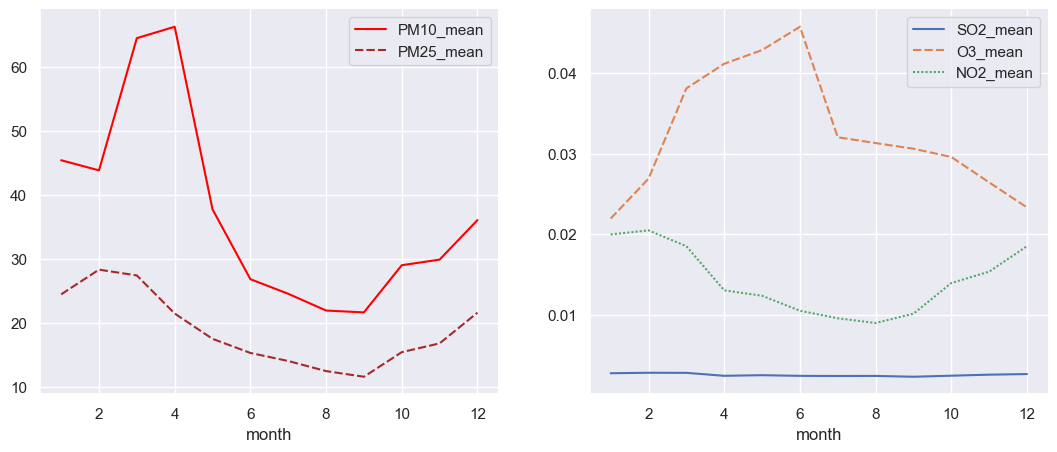

In [17]:
sns.set_theme(style="darkgrid")

f, axes = plt.subplots(1,2,figsize=(13, 5))
sns.despine(f)

sns.lineplot(
    data = country[["PM10_mean","PM25_mean"]],
        palette=['red','brown'],
        linestyle="--",
        ax=axes[0]
    )

sns.lineplot(
    data=country[["SO2_mean","O3_mean","NO2_mean"]],
    linestyle='dotted',
    ax = axes[1]
    )




-> 미세먼지는 2월에 급격하게 상승하여 4월까지 높게 나타남 (봄에 미세먼지 주의)
오존은 여름에 증가함을 확인할 수 있다.

### 주제2: 차 없는날 9월22일 -> NO2 비교

노원구 측정주소가 있는지 확인

In [28]:
filter_add = data.set_index('주소')
nowon = filter_add.filter(like="노원",axis=0)
nowon

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,datetime,month,day,hour
주소,,,,,,,,,,,,,,,
서울 노원구 상계로 118,서울 노원구,도시대기,111311,노원구,2023070101,0.0025,0.58,0.0132,0.0211,47.0,32.0,2023-07-01 01:00:00,7,1,1
서울 노원구 상계로 118,서울 노원구,도시대기,111311,노원구,2023070102,0.0027,0.54,0.0149,0.0164,44.0,28.0,2023-07-01 02:00:00,7,1,2
서울 노원구 상계로 118,서울 노원구,도시대기,111311,노원구,2023070103,0.0029,0.51,0.0151,0.0148,36.0,23.0,2023-07-01 03:00:00,7,1,3
서울 노원구 상계로 118,서울 노원구,도시대기,111311,노원구,2023070104,0.0026,0.47,0.0153,0.0125,38.0,23.0,2023-07-01 04:00:00,7,1,4
서울 노원구 상계로 118,서울 노원구,도시대기,111311,노원구,2023070105,0.0028,0.41,0.0204,0.0094,29.0,18.0,2023-07-01 05:00:00,7,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
서울 노원구 화랑로 429,서울 노원구,도로변대기,111312,화랑로,2023022820,0.0030,0.41,0.0243,0.0335,27.0,17.0,2023-02-28 20:00:00,2,28,20
서울 노원구 화랑로 429,서울 노원구,도로변대기,111312,화랑로,2023022821,0.0029,0.44,0.0215,0.0372,28.0,16.0,2023-02-28 21:00:00,2,28,21
서울 노원구 화랑로 429,서울 노원구,도로변대기,111312,화랑로,2023022822,0.0030,0.45,0.0154,0.0461,25.0,15.0,2023-02-28 22:00:00,2,28,22


노원구 시간별 평균 NO2

In [29]:
nowon = data[(data["지역"]=="서울 노원구")]
nowon_avg = nowon.groupby(['hour']).agg(
        SO2_a = pd.NamedAgg(column='SO2',aggfunc='mean'),
        O3_a = pd.NamedAgg(column='O3',aggfunc='mean'),
        NO2_a = pd.NamedAgg(column='NO2',aggfunc='mean'),
        PM10_a = pd.NamedAgg(column='PM10',aggfunc='mean'),
        PM25_a = pd.NamedAgg(column='PM25',aggfunc='mean'),
    )


In [30]:
nowon = data[(data["지역"]=="서울 노원구")&(data["month"]==11)&(data["day"]==4)]
nowon_922 = nowon.groupby(['hour']).agg(
        SO2= pd.NamedAgg(column='SO2',aggfunc='mean'),
        O3 = pd.NamedAgg(column='O3',aggfunc='mean'),
        NO2 = pd.NamedAgg(column='NO2',aggfunc='mean'),
        PM10 = pd.NamedAgg(column='PM10',aggfunc='mean'),
        PM25 = pd.NamedAgg(column='PM25',aggfunc='mean'),
    )

In [31]:
compare = nowon_avg[["NO2_a"]].merge(nowon_922[["NO2"]],on=nowon_avg.index,how='left')
compare.set_index('key_0',inplace=True)
compare

,NO2_a,NO2
key_0,,
0,0.026205,0.01275
1,0.023955,0.02040
2,0.021915,0.01560
3,0.020856,0.01235
4,0.020466,0.01205
5,0.021913,0.01590
6,0.025932,0.01780
7,0.030108,0.02225
8,0.030883,0.02130


<Axes: xlabel='key_0'>

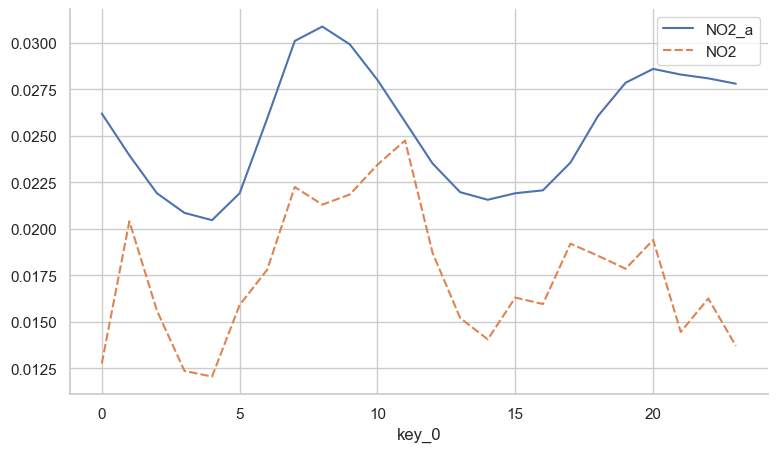

In [44]:


sns.set_theme(style="whitegrid")

f, axes = plt.subplots(figsize=(9, 5))
sns.despine(f)

sns.lineplot(
    data = compare)




차 없는 거리: 차량 배출가스 줄어든 것으로 확인

In [33]:
compare2 = nowon_avg.merge(nowon_922,on=nowon_avg.index,how='left')
compare2.set_index('key_0',inplace=True)
compare2

,SO2_a,O3_a,NO2_a,PM10_a,PM25_a,SO2,O3,NO2,PM10,PM25
key_0,,,,,,,,,,
0,0.002639,0.020572,0.026205,39.110014,19.678420,0.00250,0.02080,0.01275,10.5,4.5
1,0.002587,0.020394,0.023955,39.843441,20.864598,0.00245,0.01235,0.02040,57.0,27.0
2,0.002539,0.020370,0.021915,37.159605,19.210452,0.00275,0.01420,0.01560,60.0,23.0
3,0.002503,0.019588,0.020856,37.738397,20.689170,0.00260,0.01705,0.01235,73.0,26.0
4,0.002475,0.018410,0.020466,35.666667,18.995708,0.00265,0.01460,0.01205,78.5,23.5
5,0.002488,0.016321,0.021913,37.042674,20.479374,0.00250,0.01220,0.01590,77.5,24.0
6,0.002556,0.013462,0.025932,36.005666,19.230878,0.00255,0.01060,0.01780,76.5,22.5
7,0.002663,0.011188,0.030108,38.471086,21.076164,0.00275,0.00590,0.02225,73.0,24.0
8,0.002712,0.011926,0.030883,37.519553,19.687151,0.00275,0.00720,0.02130,62.5,21.5


<Axes: xlabel='key_0'>

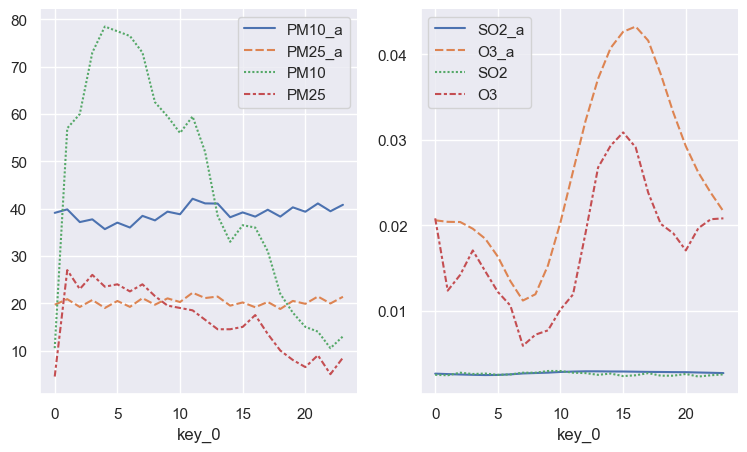

In [43]:

sns.set_theme(style="darkgrid")

f, axes = plt.subplots(1,2,figsize=(9, 5))
sns.despine(f)

sns.lineplot(
    data = compare2[["PM10_a","PM25_a","PM10","PM25"]],
    ax = axes[0])


sns.lineplot(
    data = compare2[["SO2_a","O3_a","SO2","O3"]],
    ax=axes[1])





-> NO2를 제외한 대기 질 측정
- 미세먼지는 오히려 증가
- O3 또한 감소